In [2]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
data = mnist.load_data()

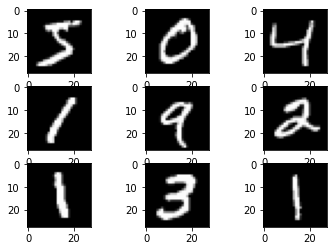

In [4]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [5]:
train_X = train_X.reshape((60000,28*28))
test_X = test_X.reshape((10000,28*28))

In [6]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)


In [7]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(train_X)
standardized_data2 = StandardScaler().fit_transform(test_X)
print(standardized_data.shape)
print(standardized_data2.shape)

(60000, 784)
(10000, 784)


## non automated implementation of PCA

In [8]:
train_data = standardized_data
covar_matrix = np.matmul(train_data.T , train_data)

In [9]:
from scipy.linalg import eigh

In [10]:
values, vectors = eigh(covar_matrix, eigvals=(782,783))

In [11]:
print('Shape of eigen vectors = ',vectors.shape)

Shape of eigen vectors =  (784, 2)


In [12]:
vectors = vectors.T

In [13]:
print(vectors)
print(vectors.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(2, 784)


In [14]:
print('Updated shape of eigen vectors = ',vectors.shape)

Updated shape of eigen vectors =  (2, 784)


In [15]:
import matplotlib.pyplot as plt
new_coordinates0 = np.matmul(vectors, train_data.T)

In [16]:
import pandas as pd
new_coordinates = np.vstack((new_coordinates0,train_y)).T
print(new_coordinates.shape)

(60000, 3)


In [17]:
dataframe = pd.DataFrame(data=new_coordinates, columns=('1st_principal', '2nd_principal', 'label'))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -4.814790      -0.922159    5.0
1      -7.754403       8.708977    0.0
2       9.431338       2.328389    4.0
3      -3.746318      -6.582173    1.0
4       3.133297      -5.183251    9.0


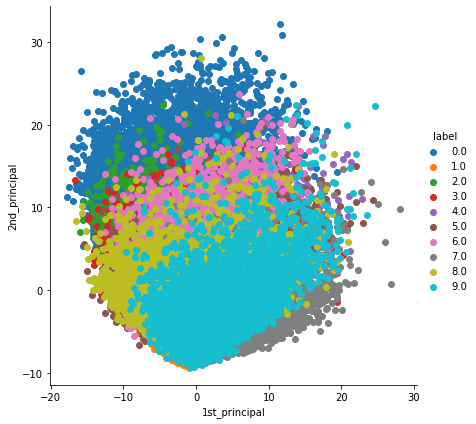

In [18]:
# plotting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue='label', size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## old dimension ---> (60000, 784)----------new dimension----->(60000,3) one of the 3 dimensions is only label for plotting

## Plotting variance using automated implementation of PCA with sklearn. below

In [19]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()
# PCA for dimensionality redcution (non-visualization)
pca.n_components = 784
pca_data = pca.fit_transform(standardized_data)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

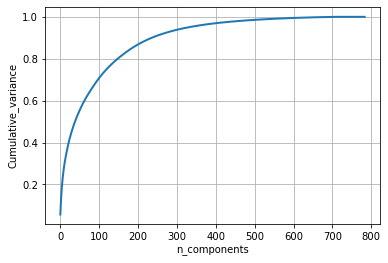

In [20]:
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_variance')
plt.show()

In [21]:
new_coordinates0.shape

(2, 60000)

In [22]:
train_y.shape

(60000,)